In [1]:
import yt
import numpy as np
from yt.visualization.volume_rendering.transfer_function_helper import TransferFunctionHelper
from yt.visualization.volume_rendering.api import Scene, VolumeSource

ds = yt.load("/data/mimir/jzuhone/data/fid_mag/1to1_b0/fiducial_1to1_b0_mag_hdf5_plt_cnt_0120")
sc = yt.create_scene(ds)

yt : [INFO     ] 2018-01-21 02:17:05,600 Particle file found: fiducial_1to1_b0_mag_hdf5_part_0120
yt : [INFO     ] 2018-01-21 02:17:05,659 Parameters: current_time              = 7.57754122879e+16
yt : [INFO     ] 2018-01-21 02:17:05,660 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2018-01-21 02:17:05,662 Parameters: domain_left_edge          = [ -2.20000000e+25  -2.20000000e+25  -2.20000000e+25]
yt : [INFO     ] 2018-01-21 02:17:05,663 Parameters: domain_right_edge         = [  2.20000000e+25   2.20000000e+25   2.20000000e+25]
yt : [INFO     ] 2018-01-21 02:17:05,665 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2018-01-21 02:17:18,440 Setting default field to ('gas', 'density')


In [2]:
print (sc)

<Scene Object>:
Sources: 
    source_00: <Volume Source>:YTRegion (fiducial_1to1_b0_mag_hdf5_plt_cnt_0120): , center=[ 0.  0.  0.] cm, left_edge=[ -2.20000000e+25  -2.20000000e+25  -2.20000000e+25] cm, right_edge=[  2.20000000e+25   2.20000000e+25   2.20000000e+25] cm transfer_function:None
Camera: 
    <Camera Object>:
	position:[  2.20000000e+25   2.20000000e+25   2.20000000e+25] code_length
	focus:[ 0.  0.  0.] code_length
	north_vector:[ 0.81649658 -0.40824829 -0.40824829]
	width:[  6.60000000e+25   6.60000000e+25   6.60000000e+25] code_length
	light:None
	resolution:(512, 512)
Lens: <Lens Object>:
	lens_type:plane-parallel
	viewpoint:[ -3.81051368e+31  -3.81051368e+31  -3.81051368e+31] code_length


In [3]:
print (sc.get_source())

<Volume Source>:YTRegion (fiducial_1to1_b0_mag_hdf5_plt_cnt_0120): , center=[ 0.  0.  0.] cm, left_edge=[ -2.20000000e+25  -2.20000000e+25  -2.20000000e+25] cm, right_edge=[  2.20000000e+25   2.20000000e+25   2.20000000e+25] cm transfer_function:None


yt : [INFO     ] 2018-01-21 02:17:42,736 Rendering scene (Can take a while).
yt : [INFO     ] 2018-01-21 02:17:42,738 Creating volume
/home/jzuhone/Source/yt/yt/utilities/amr_kdtree/amr_kdtree.py:311: RuntimeWarning: invalid value encountered in log10
  dds.append(np.log10(vcd[field].astype('float64')))
yt : [INFO     ] 2018-01-21 02:19:24,845 Creating transfer function
yt : [INFO     ] 2018-01-21 02:19:24,847 Calculating data bounds. This may take a while.  Set the TranferFunctionHelper.bounds to avoid this.


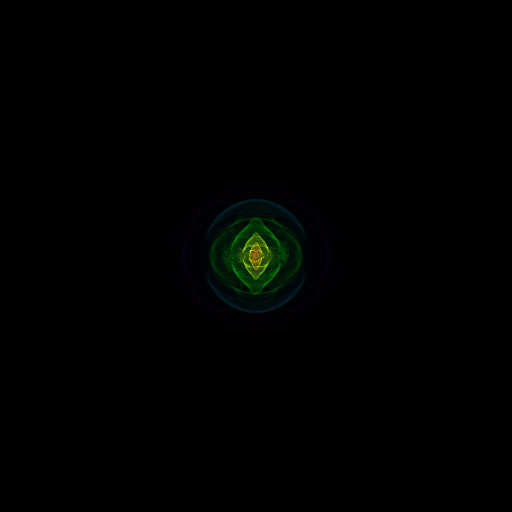

In [4]:
sc.show()

In [5]:
sc.camera.zoom(3.0)

In [6]:
print (sc)

<Scene Object>:
Sources: 
    source_00: <Volume Source>:YTRegion (fiducial_1to1_b0_mag_hdf5_plt_cnt_0120): , center=[ 0.  0.  0.] cm, left_edge=[ -2.20000000e+25  -2.20000000e+25  -2.20000000e+25] cm, right_edge=[  2.20000000e+25   2.20000000e+25   2.20000000e+25] cm transfer_function:<Color Transfer Function Object>:
x_bounds:[-30, -25] nbins:512 features:
	('gaussian', 'location(x):-30', 'width(x):0.002', 'height(y):(0.073,   0, 0.084, 0.001)')
	('gaussian', 'location(x):-30', 'width(x):0.002', 'height(y):(0.35,   0, 0.62, 0.0022)')
	('gaussian', 'location(x):-29', 'width(x):0.002', 'height(y):(  0, 0.26, 0.87, 0.0046)')
	('gaussian', 'location(x):-29', 'width(x):0.002', 'height(y):(  0, 0.65, 0.72, 0.01)')
	('gaussian', 'location(x):-28', 'width(x):0.002', 'height(y):(  0, 0.6, 0.031, 0.022)')
	('gaussian', 'location(x):-27', 'width(x):0.002', 'height(y):(  0, 0.87,   0, 0.046)')
	('gaussian', 'location(x):-27', 'width(x):0.002', 'height(y):(0.78, 0.98,   0, 0.1)')
	('gaussian', 'l

yt : [INFO     ] 2018-01-21 02:20:56,279 Rendering scene (Can take a while).


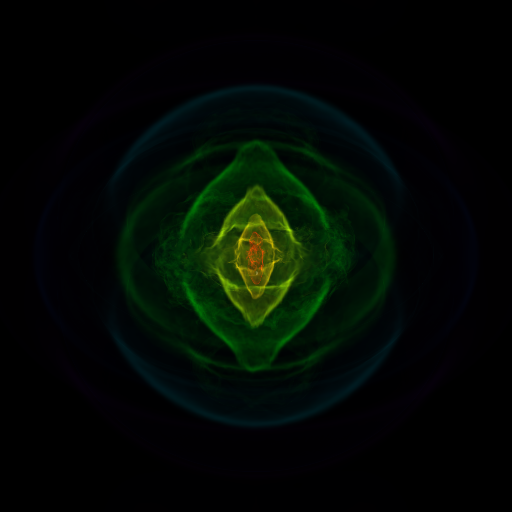

In [7]:
sc.render()
sc

In [14]:
cam = sc.add_camera(ds, lens_type='perspective')

# Standing at (x=0.05, y=0.5, z=0.5), we look at the area of x>0.05 (with some open angle
# specified by camera width) along the positive x direction.
cam.position = ds.arr([ -2.20000000e+25, 0., 0.], 'cm')

normal_vector = [1., 0., 0.]
north_vector = [0., 0., 1.]
cam.switch_orientation(normal_vector=normal_vector,
                       north_vector=north_vector)

# The width determines the opening angle
cam.set_width(ds.domain_width * 0.5)
cam.resolution = 1000

print (sc.camera)

<Camera Object>:
	position:[-0.5  0.   0. ] unitary
	focus:[ 0.  0.  0.] code_length
	north_vector:[ 0.  0.  1.] dimensionless
	width:[ 0.5  0.5  0.5] unitary
	light:None
	resolution:(1000, 1000)
Lens: <Lens Object>:
	lens_type:perspective
	viewpoint:[  1.10000000e+25   0.00000000e+00   0.00000000e+00] code_length


yt : [INFO     ] 2018-01-21 02:42:54,372 Rendering scene (Can take a while).


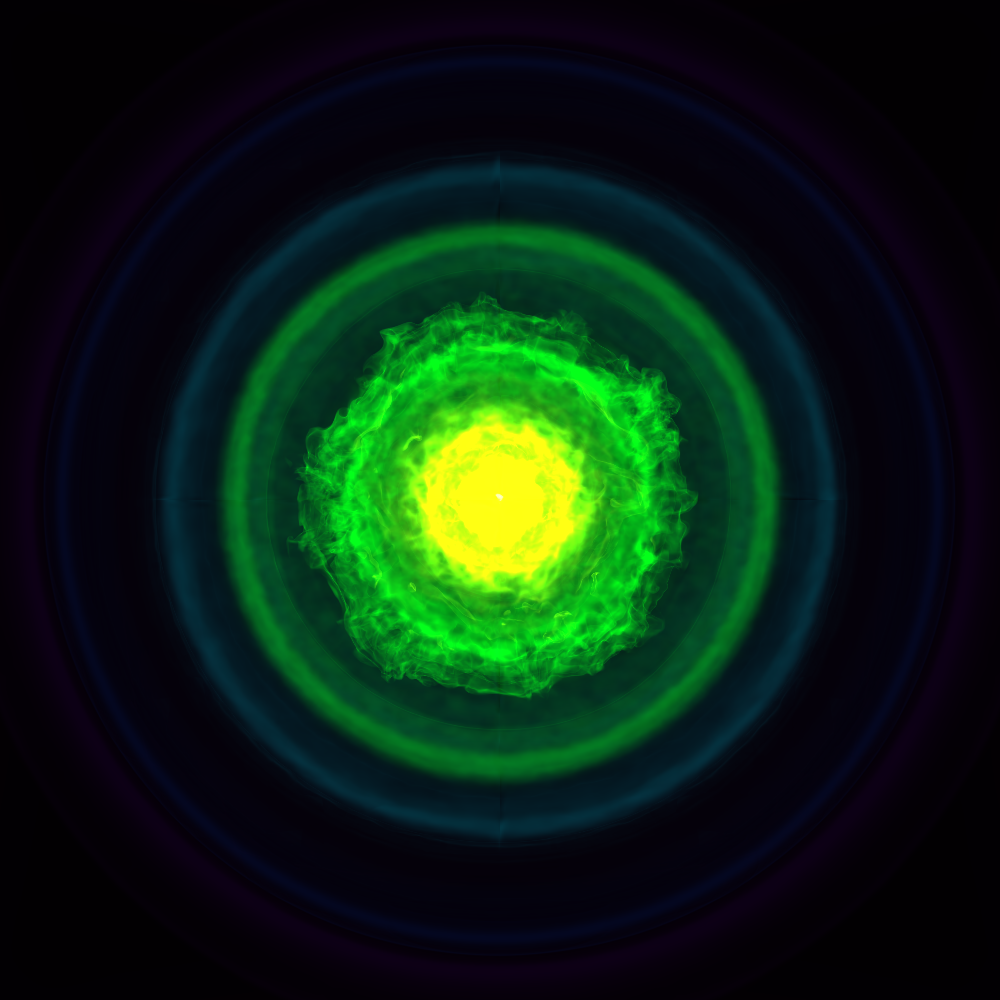

In [15]:
sc.render()
sc.show(sigma_clip=4.0)

yt : [INFO     ] 2018-01-21 02:47:49,445 Rendering scene (Can take a while).


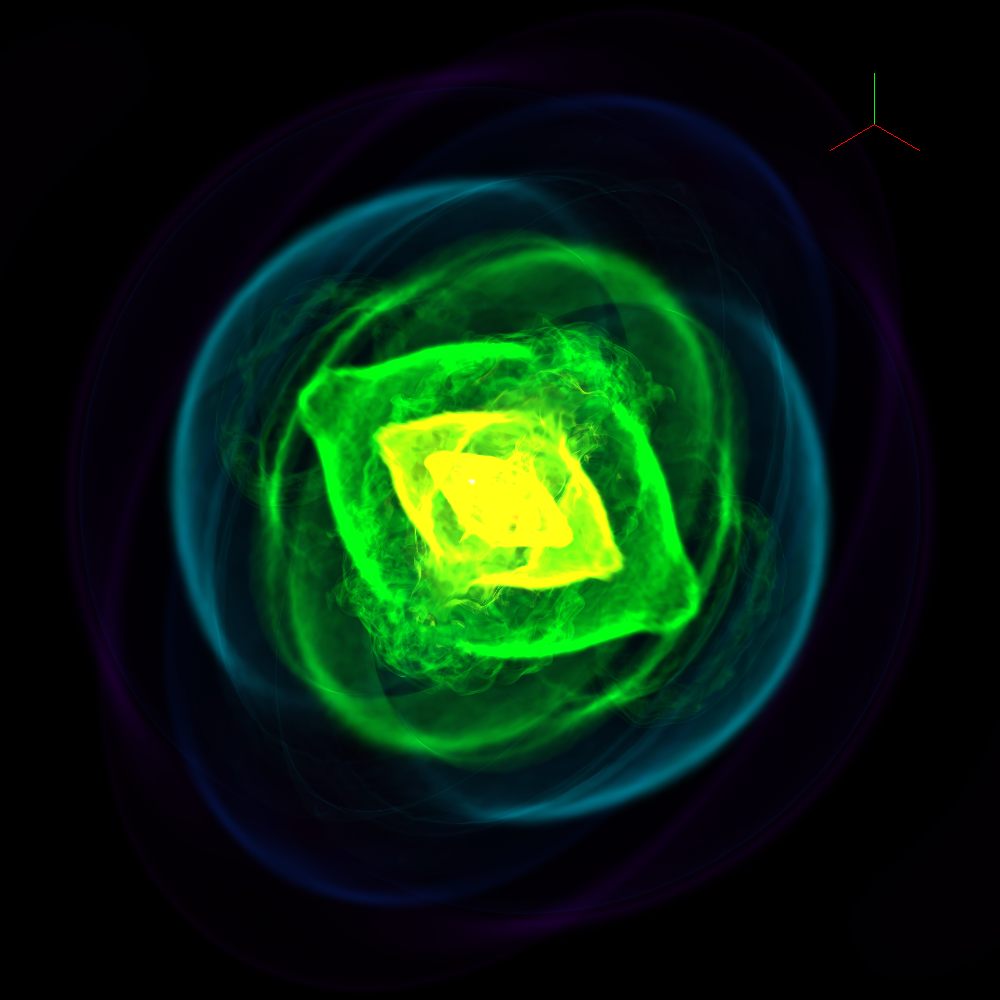

In [16]:
# set the lens type back to plane-parallel
sc.camera.set_lens('plane-parallel')

# move the camera to the left edge of the domain
sc.camera.set_position(ds.domain_left_edge)
sc.camera.switch_orientation()

# add an opaque source to the scene
sc.annotate_axes()

sc.render()
sc.show(sigma_clip=4.0)